#### 2) 회귀(Regression) 의사결정 회귀 문제 
##### 결정트리는 회귀 문제에도 사용할 수 있으며, 사이킷런의 **DecisionTreeRegressor**를 사용


In [1]:
import numpy as np   
import pandas as pd 

In [2]:
from sklearn import tree
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns

#### 예제로 1차 함수 형태의 데이터셋에서 회귀 트리 만들어 보기



In [3]:
# 1차 함수 형태는 y = x + random
nPoints = 100
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]
x = [[s] for s in xPlot]
np.random.seed(1)
y = [s + np.random.normal(scale=0.2) for s in xPlot]

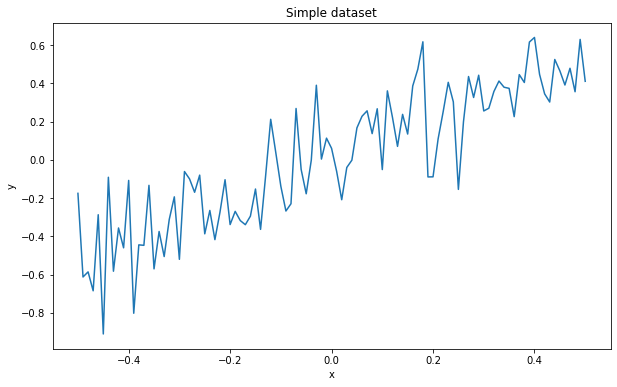

In [4]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.plot(xPlot,y)
#plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple dataset')
plt.show()

### max_depth=1 설정으로 간단한 트리 구조 

In [5]:
model = tree.DecisionTreeRegressor(max_depth=1)
model.fit(x, y)

DecisionTreeRegressor(max_depth=1)

- 아래 블럭 다이아그램에서 루트 노드는 -0.075을로 기준 (split 점)
- 이 split 값을 기준으로 2개의 그룹으로 분류
- 아래 2개의 박스 중에서 왼쪽으로는 43개의 샘플, 오른쪽에는 58개의 샘풀로 분류
- 만일 테스트 값이 x=0.2이라면, 예측 값은 y=0.253 임   


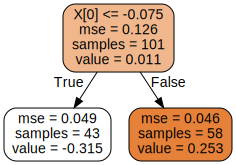

In [6]:
#draw the decision tree result with graphviz
graph = tree.export_graphviz(model, out_file = None, 
                rounded = True, filled = True)
graphviz.Source(graph)

### 예측을 해보자 

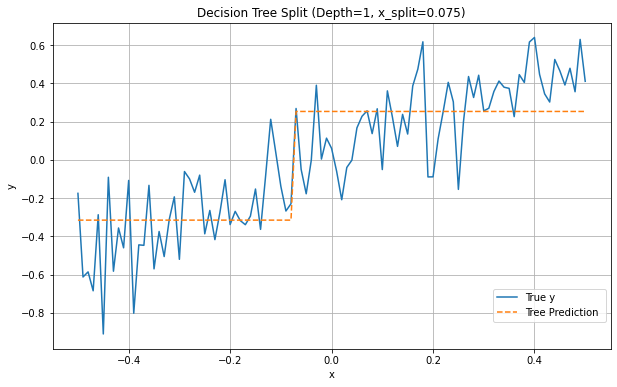

In [7]:
#compare prediction from tree with true values
yHat = model.predict(x)
plt.figure()
plt.plot(xPlot, y, label='True y')
plt.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--');

plt.legend(bbox_to_anchor=(1,0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Decision Tree Split (Depth=1, x_split=0.075)')
plt.show()

#### 연습문제 : 의사결정 나무 depth=2로 증가 시켜라 
 

In [8]:
# 결정나무 다시 설정 max_depth=2 
model2 = tree.DecisionTreeRegressor(max_depth=2)
model2.fit(x, y)

DecisionTreeRegressor(max_depth=2)

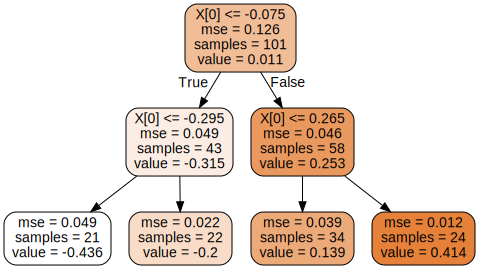

In [9]:
graph = tree.export_graphviz(model2, out_file = None, rounded = True, filled = True)
graphviz.Source(graph)

#### split 포인트는 2개가 더 생김

- x=-0.295
- x=0.264

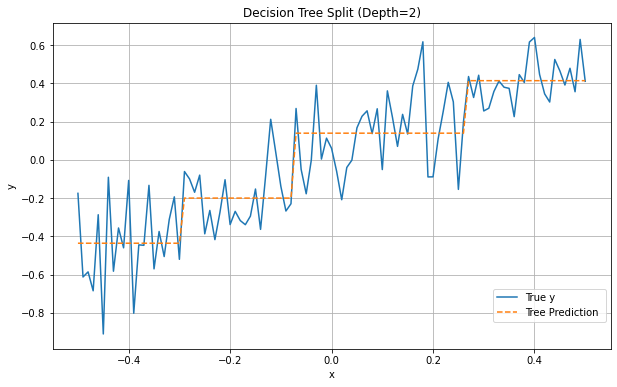

In [10]:
#compare prediction from tree with true values
yHat = model2.predict(x)

plt.figure()
plt.plot(xPlot, y, label='True y')
plt.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Decision Tree Split (Depth=2)')
plt.show()

#### Split Points 찾기는 어떻게하나?


- 트리는 예측값의 제곱 오차를 최소화(MSE)한다. 
- 생각해보면, 임의의 split 값이 주어지면 2개의 그룹 중에 1개로 선택된다. 
- 각각의 그룹의 평균은 MSE를 최소화하는 값이 된다.
- 아래 예제를 보자 

In [11]:
sse = []
xMin = []
for i in range(1, len(xPlot)):          
     lhList = list(xPlot[0:i])
     rhList = list(xPlot[i:len(xPlot)])  
     lhAvg = sum(lhList) / len(lhList)
     rhAvg = sum(rhList) / len(rhList)     
     lhSse = sum([(s - lhAvg) * (s - lhAvg) for s in lhList])
     rhSse = sum([(s - rhAvg) * (s - rhAvg) for s in rhList])
     sse.append(lhSse + rhSse)
     xMin.append(max(lhList))

#### 결과는 잘 알려진 포물선 모양 
- 최소값은 

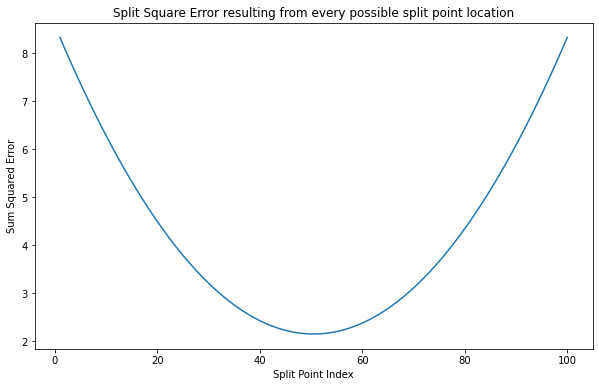

In [12]:
#SSE is sum of squared error
plt.plot(range(1, len(xPlot)), sse)
plt.xlabel('Split Point Index')
plt.ylabel('Sum Squared Error')
plt.title('Split Square Error resulting from every possible split point location')
plt.show()

#### SSE 함수에서 최소값을 찾고, 최소값의 위치를 찾은 다음, 
#### 그 값에 해당하는 최소값

In [13]:
minSse = min(sse)
idxMin = sse.index(minSse)
print(xMin[idxMin])

-0.010000000000000009


#### 멀티 변수 트리 학습은 어떻게?

- 알고리듬은 MSE의 최소값에 기여하는 모든 가능한 split point을 찾는다. 


#### 결정트리의 과적합 (Overfitting) 문제 

- 데이터는 적은데 너무 많은 split point를 고려해보면
- 학습은 잘 되는데, 예측할때 틀릴 수가 많다. 
- depth를 높여서 실습해보자 



#### 연습문제2: max_depth를 3로 높여서 예측해보기

In [14]:
model3 = tree.DecisionTreeRegressor(max_depth=3)
model3.fit(x, y);

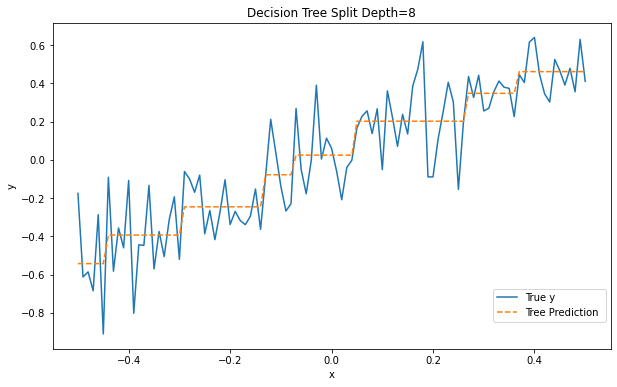

In [15]:
#compare prediction from tree with true values
yHat = model3.predict(x)

plt.figure()
plt.plot(xPlot, y, label='True y')
plt.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plt.legend(bbox_to_anchor=(1,0.2))

plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree Split Depth=8')
plt.show()

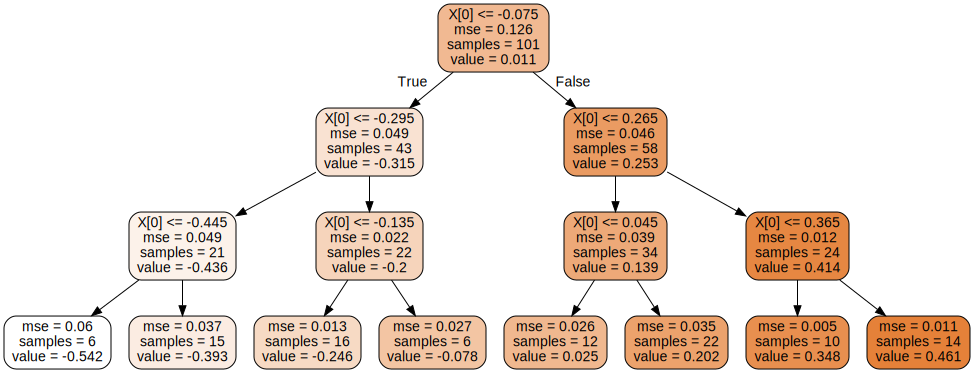

In [16]:
graph = tree.export_graphviz(model3, out_file = None, rounded = True, filled = True)
graphviz.Source(graph)

#### 숙제: 데이터 숫자를 늘려서 확인해보기
- 데이터 개수를 nPoints = 200로 2개 증가 시킴
- max_depth=1
- max_depth=2
- max_depth=4 
일때 결정트리의 예측정확도를 구해라?